<a href="https://colab.research.google.com/github/apchavezr/Fundamentos-de-Estad-stica---Ciencia-de-Datos/blob/main/Ejercicio2_Imputacion_Valores_Perdidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 2: Análisis de valores perdidos e imputación

Este ejercicio tiene como objetivo identificar y tratar valores perdidos en un conjunto de datos real, utilizando el conjunto **Titanic** provisto por Seaborn. Se aplicarán distintas estrategias de imputación y se compararán sus efectos.

---
## 1. Cargar el conjunto de datos

Se usará el conjunto de datos Titanic incluido en Seaborn.


In [2]:
import seaborn as sns
import pandas as pd

# Cargar dataset
df = sns.load_dataset("titanic")

# Vista general del conjunto
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


---

## 2. Porcentaje de valores perdidos por variable


In [3]:
# Calcular porcentaje de datos faltantes
faltantes = df.isnull().mean().sort_values(ascending=False) * 100
faltantes = faltantes[faltantes > 0]
faltantes

,0
deck,77.216611
age,19.865320
embarked,0.224467
embark_town,0.224467


---

## 3. Identificación del tipo de mecanismo de ausencia

Aunque no se puede determinar con certeza sin análisis más avanzados, a partir del conocimiento del contexto se puede inferir que:

- Algunas ausencias como `age` pueden ser **MCAR** (ausencia completamente al azar) o **MAR** (dependiente de otras variables como clase o sexo).
- La variable `deck` tiene alta proporción de ausencia, probablemente **NMAR** (ausencia no al azar), ya que puede depender de la clase o tarifa del pasaje.

Esta clasificación es **hipotética** y depende del análisis más profundo del contexto y correlaciones.

---
## 4. Estrategias de imputación


In [4]:
# Estrategia 1: Imputar 'age' con la media
df_media = df.copy()
df_media['age'] = df_media['age'].fillna(df_media['age'].mean())

In [5]:
# Estrategia 2: Imputar 'age' con la mediana
df_mediana = df.copy()
df_mediana['age'] = df_mediana['age'].fillna(df_mediana['age'].median())

---

## 5. Comparación de resultados

Se comparan las distribuciones de edad luego de la imputación.


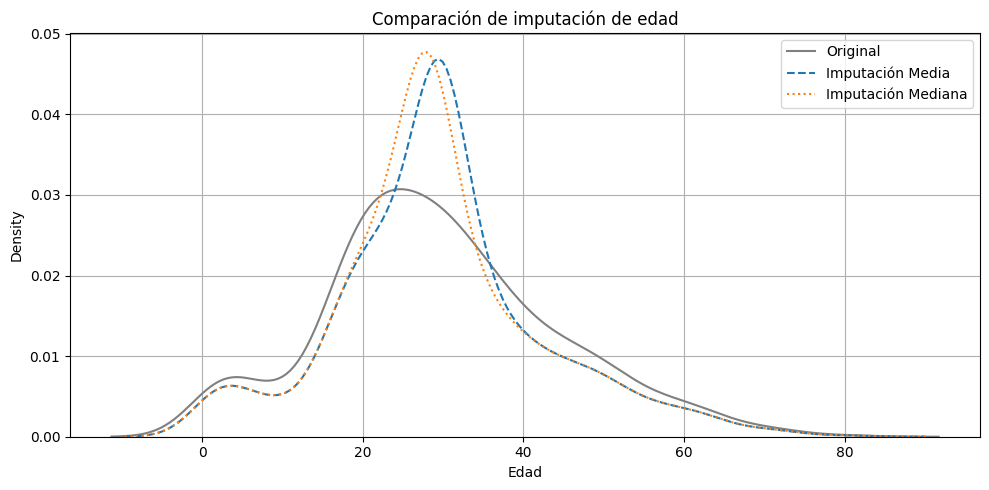

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.kdeplot(df['age'], label='Original', color='gray')
sns.kdeplot(df_media['age'], label='Imputación Media', linestyle='--')
sns.kdeplot(df_mediana['age'], label='Imputación Mediana', linestyle=':')
plt.title('Comparación de imputación de edad')
plt.xlabel('Edad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

---

## ✅ Conclusión

- La imputación con la **media** tiende a suavizar los extremos, pero puede verse afectada por outliers.
- La imputación con la **mediana** es más robusta ante valores extremos y conserva mejor la forma de la distribución original.
- La selección de la estrategia depende del análisis exploratorio y del impacto en los modelos posteriores.

Este ejercicio demuestra la importancia de entender el tipo de ausencia y de evaluar distintas formas de imputación antes de aplicar modelos predictivos.

